In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# scipy
import scipy as sp

# scikit-learn
import sklearn as sk

# import other important functions and algorithms
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [2]:
# Get 2019 to 2020 data
url_2019 = "/Users/saejin123/Desktop/Every Player Data 2019-20.csv"

In [3]:
df_key_stats_2019 = pd.read_csv(url_2019)
df_key_stats_2019.keys()

Index(['First Name', 'Surname', 'Team', 'Pos', '£Start', '£End',
       'Total Points', 'Points Per Game', 'Transfers In', 'Transfers Out',
       'Season Value', 'Minutes', 'Goals', 'Assists', 'Clean Sheets',
       'Goals Conceded', 'Own Goals', 'Penalties Saved', 'Penalties Missed',
       'Yellow Cards', 'Red Cards', 'Saves', 'Bonus Points', 'BPS',
       'Influence', 'Creativity', 'Threat', 'ICT Index', 'Influence Rank',
       'Creativity Rank', 'Threat Rank', 'ICT Index Rank'],
      dtype='object')

In [4]:
# Fix the column headers
df_key_stats_2019.columns = ["First_Name","Surname","Team","Pos","Start_Price","End_Price","Total_Points","Points_Per_Game","Transfers_In","Transfers_Out","Season_Value","Minutes","Goals","Assists","Clean_Sheets","Goals_Conceded","Own_Goals","Penalties_Saved","Penalties_Missed","Yellow_Cards","Red_Cards","Saves","Bonus_Points","BPS","Influence","Creativity","Threat","ICT_Index","Influence_Rank","Creativity_Rank","Threat_Rank","ICT_Index_Rank"]
df_key_stats_2019

,First_Name,Surname,Team,Pos,Start_Price,End_Price,Total_Points,Points_Per_Game,Transfers_In,Transfers_Out,...,Bonus_Points,BPS,Influence,Creativity,Threat,ICT_Index,Influence_Rank,Creativity_Rank,Threat_Rank,ICT_Index_Rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kevin,De Bruyne,MCI,MID,9.5,10.6,251.0,7.2,6122288.0,4010477.0,...,35.0,988.0,1322.0,1991.0,1005.0,432.0,1.0,1.0,27.0,1.0
2,Tammy,Abraham,CHE,FWD,7.0,7.3,153.0,4.5,5791038.0,5254123.0,...,20.0,461.0,660.0,283.0,1301.0,223.0,58.0,150.0,10.0,28.0
3,Jamie,Vardy,LEI,FWD,9.0,9.7,210.0,6.0,5467849.0,4430099.0,...,34.0,775.0,1026.0,418.0,1455.0,289.0,5.0,94.0,8.0,9.0
4,Raúl,Jiménez,WOL,FWD,7.5,8.0,194.0,5.1,4677222.0,3995389.0,...,33.0,685.0,912.0,668.0,1680.0,325.0,15.0,27.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Joel,Mumbongo,BUR,FWD,4.5,4.5,0.0,0.0,57.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,624.0,614.0,601.0,626.0
663,Alexandre,Jankewitz,SOT,MID,4.5,4.5,0.0,0.0,45.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,630.0,619.0,608.0,632.0
664,John-Kymani,Gordon,CRY,MID,4.5,4.5,0.0,0.0,30.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,633.0,622.0,611.0,635.0
665,Jacob,Maddox,SOT,MID,4.5,4.5,0.0,0.0,22.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,603.0,593.0,579.0,605.0


In [5]:
# Pick the features we want
df_key_stats_2019 = df_key_stats_2019[["Pos","First_Name","Surname","Start_Price","End_Price","Points_Per_Game","Total_Points","Season_Value","Minutes","Goals","Assists","Clean_Sheets","Own_Goals","Penalties_Saved","Penalties_Missed","Yellow_Cards","Red_Cards","Bonus_Points","Influence","Creativity","Threat"]]
df_key_stats_2019 = df_key_stats_2019.iloc[1:]
df_key_stats_2019

,Pos,First_Name,Surname,Start_Price,End_Price,Points_Per_Game,Total_Points,Season_Value,Minutes,Goals,...,Clean_Sheets,Own_Goals,Penalties_Saved,Penalties_Missed,Yellow_Cards,Red_Cards,Bonus_Points,Influence,Creativity,Threat
1,MID,Kevin,De Bruyne,9.5,10.6,7.2,251.0,23.7,2790.0,13.0,...,18.0,0.0,0.0,0.0,3.0,0.0,35.0,1322.0,1991.0,1005.0
2,FWD,Tammy,Abraham,7.0,7.3,4.5,153.0,21.0,2206.0,15.0,...,7.0,1.0,0.0,0.0,2.0,0.0,20.0,660.0,283.0,1301.0
3,FWD,Jamie,Vardy,9.0,9.7,6.0,210.0,21.6,3032.0,23.0,...,11.0,0.0,0.0,1.0,3.0,0.0,34.0,1026.0,418.0,1455.0
4,FWD,Raúl,Jiménez,7.5,8.0,5.1,194.0,24.2,3241.0,17.0,...,15.0,0.0,0.0,0.0,3.0,0.0,33.0,912.0,668.0,1680.0
5,FWD,Danny,Ings,6.0,7.6,5.2,198.0,26.1,2800.0,22.0,...,6.0,0.0,0.0,1.0,3.0,0.0,40.0,1010.0,458.0,1558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,FWD,Joel,Mumbongo,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,MID,Alexandre,Jankewitz,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,MID,John-Kymani,Gordon,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,MID,Jacob,Maddox,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df_key_stats_2019.shape) # 666 rows and 21 columns

(666, 21)


In [7]:
df_key_stats_2019.isnull().values.any()

False

In [8]:
dataTypeDict = dict(df_key_stats_2019.dtypes)
print(dataTypeDict)

{'Pos': dtype('O'), 'First_Name': dtype('O'), 'Surname': dtype('O'), 'Start_Price': dtype('float64'), 'End_Price': dtype('float64'), 'Points_Per_Game': dtype('float64'), 'Total_Points': dtype('float64'), 'Season_Value': dtype('float64'), 'Minutes': dtype('float64'), 'Goals': dtype('float64'), 'Assists': dtype('float64'), 'Clean_Sheets': dtype('float64'), 'Own_Goals': dtype('float64'), 'Penalties_Saved': dtype('float64'), 'Penalties_Missed': dtype('float64'), 'Yellow_Cards': dtype('float64'), 'Red_Cards': dtype('float64'), 'Bonus_Points': dtype('float64'), 'Influence': dtype('float64'), 'Creativity': dtype('float64'), 'Threat': dtype('float64')}


In [9]:
print(df_key_stats_2019.describe()) # statistical overview of the data

       Start_Price   End_Price  Points_Per_Game  Total_Points  Season_Value  \
count   666.000000  666.000000       666.000000    666.000000    666.000000   
mean      5.200450    5.036336         1.970571     46.564565      8.502402   
std       1.178115    1.191524         1.487433     49.826582      8.308484   
min       4.000000    3.800000         0.000000      0.000000      0.000000   
25%       4.500000    4.300000         1.000000      1.000000      0.200000   
50%       5.000000    4.700000         2.000000     33.000000      6.700000   
75%       5.500000    5.300000         2.900000     76.750000     15.075000   
max      12.500000   12.500000         8.400000    251.000000     32.700000   

           Minutes       Goals     Assists  Clean_Sheets   Own_Goals  \
count   666.000000  666.000000  666.000000    666.000000  666.000000   
mean   1124.833333    1.503003    1.352853      3.524024    0.049550   
std    1101.101809    3.270394    2.395509      4.109061    0.217176   


In [10]:
print(df_key_stats_2019.groupby('Pos').size()) # the output variable 

Pos
DEF    224
FWD     92
GKP     73
MID    277
dtype: int64


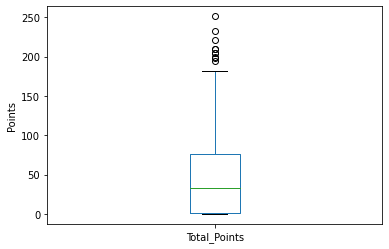

In [11]:
# Boxplot of Total_Points
df_key_stats_2019["Total_Points"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.ylabel("Points")
plt.show()

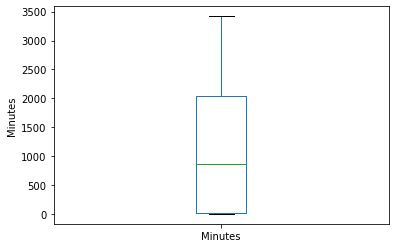

In [12]:
# Boxplot of Minutes
df_key_stats_2019["Minutes"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.ylabel("Minutes")
plt.ylabel("Minutes")
plt.show()

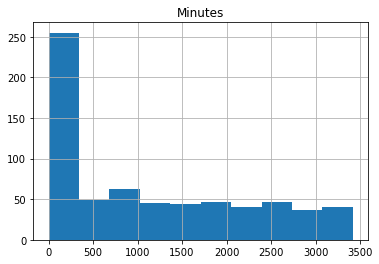

In [13]:
# Notice how many players barely play or don't play at all
df_key_stats_2019[["Minutes"]].hist()
plt.show()

In [14]:
# weed out players who do not play even 600 minutes
df_key_stats_2019.sort_values('Minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2019
count = 0
for index, row in df_key_stats_2019.iterrows():
    if(row["Minutes"] < 600):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2019 = df_key_stats_2019[285:]

285


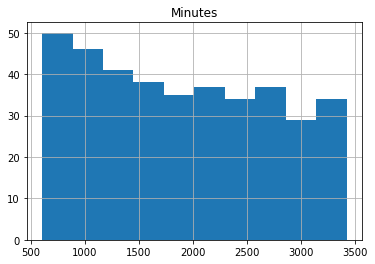

In [15]:
# better data to work with
df_key_stats_2019[["Minutes"]].hist()
plt.show()

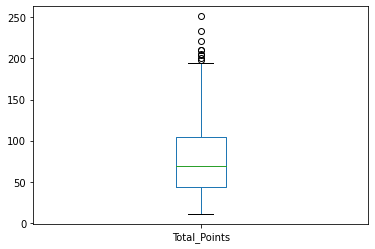

In [16]:
# Box plot check again
df_key_stats_2019["Total_Points"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

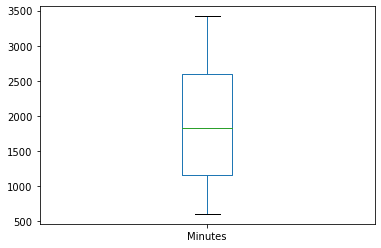

In [17]:
# Box plot check again
df_key_stats_2019["Minutes"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

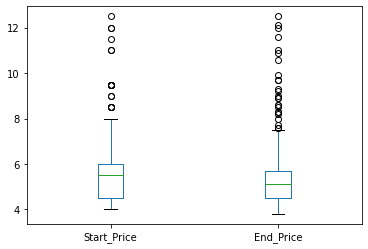

In [18]:
# boxplot of starting price and end price
df_key_stats_2019[["Start_Price","End_Price"]].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

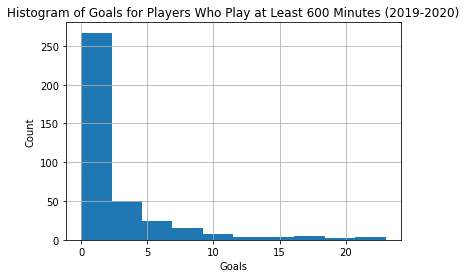

In [19]:
df_key_stats_2019["Goals"].hist()
plt.xlabel("Goals")
plt.ylabel("Count")
plt.title("Histogram of Goals for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

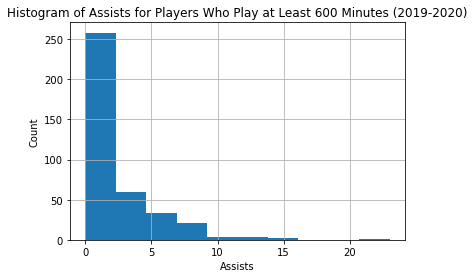

In [20]:
df_key_stats_2019["Assists"].hist()
plt.xlabel("Assists")
plt.ylabel("Count")
plt.title("Histogram of Assists for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

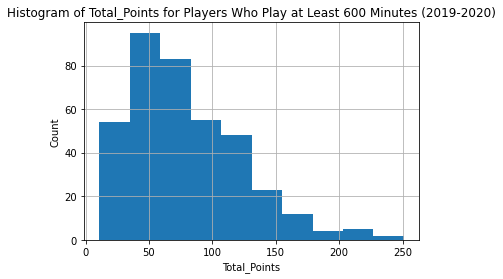

In [21]:
df_key_stats_2019["Total_Points"].hist()
plt.xlabel("Total_Points")
plt.ylabel("Count")
plt.title("Histogram of Total_Points for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

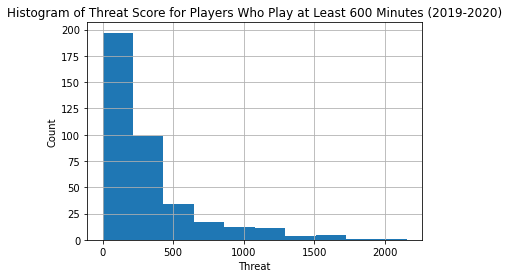

In [22]:
df_key_stats_2019["Threat"].hist()
plt.xlabel("Threat")
plt.ylabel("Count")
plt.title("Histogram of Threat Score for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

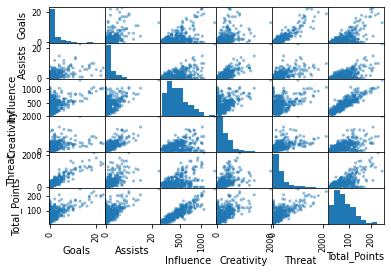

In [23]:
# quick scatter matrix view to see the relationship between variables
scatter_matrix(df_key_stats_2019[["Goals","Assists","Influence","Creativity","Threat","Total_Points"]])
plt.xticks(rotation = 90)
plt.show()

In [24]:
# split-out validation dataset (testing data)
array = df_key_stats_2019.values
X = array[:,4:] # row, columns of the features that I want
y = array[:,0] # output variable: player position
X_train,X_validation,Y_train,Y_validation = train_test_split(X,y,test_size = 0.2, random_state = 1) # random state means seed

In [25]:
# Algorithms
all_models = []
# liblinear has both L1 and L2 regularization
#     - Ridge Regression and Lasso Regression -> avoid overfitting and feature selection
# ovr means it's a binary problem for each label (one vs rest)
all_models.append(("LogReg",LogisticRegression(solver = "liblinear", multi_class="ovr")))

# maximizes seperation using our chosen features
#     - maximizing distance between means and minimizing variance 
#     - reduces features down 
#     - minimizes the scatter
all_models.append(("LDA",LinearDiscriminantAnalysis()))

# classification algorithm that memorizes observations to classify new data
#     - new data is classified by observing the "nearest neighbours"
all_models.append(("KNN", KNeighborsClassifier()))

# tree-like diagram where each leaf node is the outcome that is used to classify new data
all_models.append(("CART",DecisionTreeClassifier()))

# uses the Gaussian distribution to classify new data
all_models.append(("NB",GaussianNB()))

# uses a threshold that is the midpoint between different classifications
all_models.append(("SVM-g",SVC(gamma = "auto")))

# evaluate each model
results = []
names = []
# go through each model and perform cross validation to compare different machine learning algorithms
#     - kind of like foiling through the n_splits and training and testing for each algorithm
for name, model in all_models:
  kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
  cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring = "accuracy") # evaluate score using cross validation
  results.append(cv_results)
  names.append(name)
  print("%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())) # take the mean and standard deviation

LogReg:0.839032(0.042243)
LDA:0.825591(0.049653)
KNN:0.674624(0.049608)
CART:0.697527(0.092196)
NB:0.619140(0.101877)
SVM-g:0.430968(0.009297)


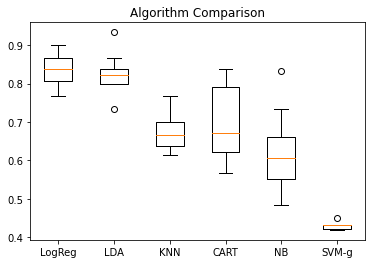

In [26]:
# compare algorithms
plt.boxplot(results,labels = names)
plt.title("Algorithm Comparison")
plt.show()
# best algorithm is Logistic Regression in terms of the mean

In [27]:
# best model - Logistic Regression
model = LogisticRegression(solver = "liblinear", multi_class="ovr",random_state = 1) 
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

In [28]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8441558441558441
[[27  0  0  5]
 [ 0  6  0  1]
 [ 0  0  6  0]
 [ 5  1  0 26]]
              precision    recall  f1-score   support

         DEF       0.84      0.84      0.84        32
         FWD       0.86      0.86      0.86         7
         GKP       1.00      1.00      1.00         6
         MID       0.81      0.81      0.81        32

    accuracy                           0.84        77
   macro avg       0.88      0.88      0.88        77
weighted avg       0.84      0.84      0.84        77



{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-9.02722916e-01  1.57858432e+00 -1.70118492e-02 -7.48809800e-02
  1.17690069e-03 -6.29201123e-01  2.42115220e-02 -1.46271118e-01
  2.39000648e-01 -3.08812016e+00  8.37280887e-02  1.23488930e-01
  7.43919915e-01  1.21656886e-01  8.06794412e-04 -1.30975307e-03
 -4.89542664e-05]
Index(['End_Price', 'Points_Per_Game', 'Total_Points', 'Season_Value',
       'Minutes', 'Goals', 'Assists', 'Clean_Sheets', 'Own_Goals',
       'Penalties_Saved', 'Penalties_Missed', 'Yellow_Cards', 'Red_Cards',
       'Bonus_Points', 'Influence', 'Creativity', 'Threat'],
      dtype='object')
Feature: 0, Score: -0.90272
Feature: 1, Score: 1.57858
Feature: 2, Score: -0.01701
Feature: 3, Score: -0.07488
Feature: 4, Score: 0.00118
Feature: 5,

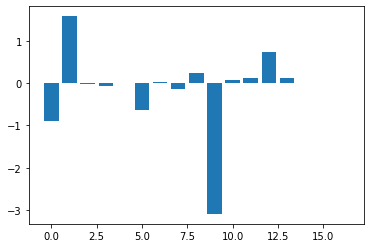

In [29]:
importance=model.coef_[0] # Coefficient of the features
print(model.get_params())
print(importance)
print(df_key_stats_2019.columns[4:])
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The top 3 most important features, using logistic regression, are Feature 9, Feature 1, and Feature 0 in this order. <br>
Feature 9: Penalties Saved <br>
Feature 1: Points_Per_Game <br>
Feature 0: End_Price <br>

In [30]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,Y_train)
predictions = lda.predict(X_validation)

In [31]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8441558441558441
[[28  0  1  3]
 [ 0  4  0  3]
 [ 0  0  6  0]
 [ 5  0  0 27]]
              precision    recall  f1-score   support

         DEF       0.85      0.88      0.86        32
         FWD       1.00      0.57      0.73         7
         GKP       0.86      1.00      0.92         6
         MID       0.82      0.84      0.83        32

    accuracy                           0.84        77
   macro avg       0.88      0.82      0.84        77
weighted avg       0.85      0.84      0.84        77



In [32]:
# make predictions decision tree
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_validation)

In [33]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.7012987012987013
[[20  0  0 12]
 [ 0  6  0  1]
 [ 0  0  6  0]
 [ 6  4  0 22]]
              precision    recall  f1-score   support

         DEF       0.77      0.62      0.69        32
         FWD       0.60      0.86      0.71         7
         GKP       1.00      1.00      1.00         6
         MID       0.63      0.69      0.66        32

    accuracy                           0.70        77
   macro avg       0.75      0.79      0.76        77
weighted avg       0.71      0.70      0.70        77



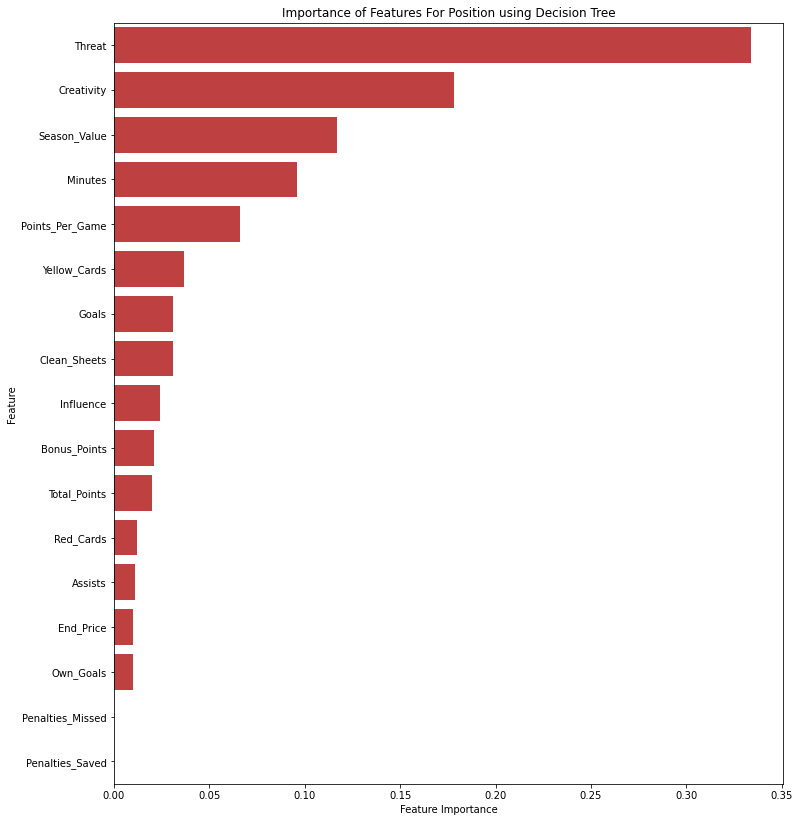

In [34]:
# Find the most important features using Decision Tree
important_features = pd.DataFrame({'feature':df_key_stats_2019.columns[4:],'importance':np.round(clf.feature_importances_,3)})
important_features = important_features.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=important_features,
                color="red", saturation=.5, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Importance of Features For Position using Decision Tree')
plt.show()

In [35]:
# Get 2020 to 2021 data and use this model to predict their positions
url_2021 = 'https://fantasy.premierleague.com/api/bootstrap-static/'
req = requests.get(url_2021)
json = req.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [36]:
df_elements = pd.DataFrame(json['elements'])
df_elements_types = pd.DataFrame(json['element_types'])
df_teams = pd.DataFrame(json['teams'])

In [37]:
df_elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [38]:
pd.set_option('mode.chained_assignment', None) # ignore warning
df_key_stats_2021 = df_elements[["team","element_type","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_key_stats_2021['position'] = df_key_stats_2021.element_type.map(df_elements_types.set_index('id').singular_name) # position of player
df_key_stats_2021['team'] = df_key_stats_2021.team.map(df_teams.set_index('id').name) # team of player
df_key_stats_2021['now_cost'] = df_key_stats_2021['now_cost'].map(lambda x: x/10) # cost of player
df_key_stats_2021['value'] = df_key_stats_2021.apply(lambda row: round(row.total_points/row.now_cost,2), axis = 1) # total points/cost of player
def change_name(x):
    if(x == "Midfielder"):
        return "MID"
    elif(x == "Forward"):
        return "FWD"
    elif(x == "Goalkeeper"):
        return "GKP"
    else:
        return "DEF"
        
df_key_stats_2021["position"] = [change_name(x) for x in df_key_stats_2021["position"]]
df_key_stats_2021

,team,element_type,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,...,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat,position,value
0,Arsenal,3,Mesut,Özil,6.7,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,MID,0.00
1,Arsenal,2,Sokratis,Papastathopoulos,4.8,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,DEF,0.00
2,Arsenal,2,David,Luiz Moreira Marinho,5.4,2.0,20,3.7,659,0,...,0,0,1,0,0,115.4,28.8,56.0,DEF,3.70
3,Arsenal,3,Pierre-Emerick,Aubameyang,11.3,4.2,71,6.3,1514,5,...,0,0,2,0,6,272.2,226.3,519.0,MID,6.28
4,Arsenal,2,Cédric,Soares,4.6,6.5,13,2.8,95,0,...,0,0,0,0,3,29.2,32.3,2.0,DEF,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Wolves,2,Lewis,Richards,4.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,DEF,0.00
637,Wolves,2,Christian,Marques,4.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,DEF,0.00
638,Wolves,1,Andreas,Söndergaard,4.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,GKP,0.00
639,Wolves,4,Patrick,Cutrone,6.0,1.0,2,0.3,23,0,...,0,0,0,0,0,0.0,0.0,4.0,FWD,0.33


In [39]:
df_key_stats_2021 = df_key_stats_2021[["position","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_key_stats_2021

,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,assists,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
0,MID,Mesut,Özil,6.7,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,DEF,Sokratis,Papastathopoulos,4.8,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,DEF,David,Luiz Moreira Marinho,5.4,2.0,20,3.7,659,0,0,2,0,0,0,1,0,0,115.4,28.8,56.0
3,MID,Pierre-Emerick,Aubameyang,11.3,4.2,71,6.3,1514,5,1,7,1,0,0,2,0,6,272.2,226.3,519.0
4,DEF,Cédric,Soares,4.6,6.5,13,2.8,95,0,1,1,0,0,0,0,0,3,29.2,32.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,DEF,Lewis,Richards,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
637,DEF,Christian,Marques,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
638,GKP,Andreas,Söndergaard,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
639,FWD,Patrick,Cutrone,6.0,1.0,2,0.3,23,0,0,0,0,0,0,0,0,0,0.0,0.0,4.0


In [40]:
df_key_stats_2021.sort_values('minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2021 = df_key_stats_2021.reset_index(drop=True)
df_key_stats_2021

,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,assists,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
0,MID,Mesut,Özil,6.7,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,MID,Jay-Roy,Grot,4.7,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,GKP,Kamil,Miazek,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,MID,Jordan,Stevens,4.3,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,DEF,Oliver,Casey,3.9,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,GKP,Vicente,Guaita,4.8,3.3,62,12.9,1710,0,0,3,0,1,0,2,0,9,420.8,0.0,0.0
637,GKP,Rui Pedro,dos Santos Patrício,5.4,2.9,56,10.4,1710,0,0,4,0,1,0,1,0,3,314.4,0.0,0.0
638,DEF,Aaron,Cresswell,5.4,4.6,87,16.1,1710,0,6,7,0,0,0,0,0,10,378.6,463.2,47.0
639,GKP,Bernd,Leno,5.0,4.2,79,15.8,1710,0,0,7,0,1,0,0,0,6,384.0,0.0,0.0


array([[<AxesSubplot:title={'center':'minutes'}>]], dtype=object)

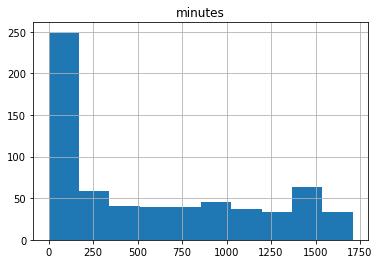

In [41]:
df_key_stats_2021[["minutes"]].hist()

In [42]:
# remove players who have less than 300 minutes of playing time
count = 0
for index, row in df_key_stats_2021.iterrows():
    if(row["minutes"] < 300):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2021 = df_key_stats_2021[302:]
df_key_stats_2021 = df_key_stats_2021.reset_index(drop=True)

300


In [43]:
dataTypeDict = dict(df_key_stats_2021.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'now_cost': dtype('float64'), 'points_per_game': dtype('O'), 'total_points': dtype('int64'), 'value_season': dtype('O'), 'minutes': dtype('int64'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'clean_sheets': dtype('int64'), 'own_goals': dtype('int64'), 'penalties_saved': dtype('int64'), 'penalties_missed': dtype('int64'), 'yellow_cards': dtype('int64'), 'red_cards': dtype('int64'), 'bonus': dtype('int64'), 'influence': dtype('O'), 'creativity': dtype('O'), 'threat': dtype('O')}


In [44]:
df_key_stats_2021[["influence","creativity","threat"]] = df_key_stats_2021[["influence","creativity","threat"]].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [45]:
df_key_stats_2021
dataTypeDict = dict(df_key_stats_2021.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'now_cost': dtype('float64'), 'points_per_game': dtype('O'), 'total_points': dtype('int64'), 'value_season': dtype('O'), 'minutes': dtype('int64'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'clean_sheets': dtype('int64'), 'own_goals': dtype('int64'), 'penalties_saved': dtype('int64'), 'penalties_missed': dtype('int64'), 'yellow_cards': dtype('int64'), 'red_cards': dtype('int64'), 'bonus': dtype('int64'), 'influence': dtype('float64'), 'creativity': dtype('float64'), 'threat': dtype('float64')}


Text(0, 0.5, 'count')

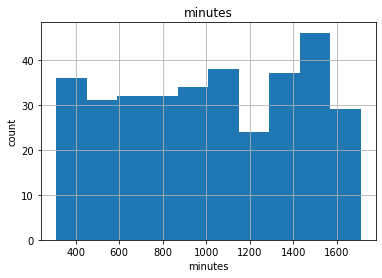

In [46]:
df_key_stats_2021[["minutes"]].hist()
plt.xlabel("minutes")
plt.ylabel("count")

In [47]:
print(df_key_stats_2021.shape) # 339 rows and 20 columns

(339, 20)


In [48]:
df_key_stats_2021.isnull().values.any()

False

In [49]:
print(df_key_stats_2021.describe()) # statistical overview of the data

         now_cost  total_points      minutes  goals_scored     assists  \
count  339.000000    339.000000   339.000000    339.000000  339.000000   
mean     5.543658     42.946903  1022.221239      1.389381    1.277286   
std      1.377733     24.441758   408.432740      2.227187    1.755747   
min      3.900000      2.000000   310.000000      0.000000    0.000000   
25%      4.700000     24.000000   678.500000      0.000000    0.000000   
50%      5.200000     38.000000  1015.000000      1.000000    1.000000   
75%      5.800000     57.000000  1402.000000      2.000000    2.000000   
max     12.500000    142.000000  1710.000000     13.000000   11.000000   

       clean_sheets   own_goals  penalties_saved  penalties_missed  \
count    339.000000  339.000000       339.000000        339.000000   
mean       3.566372    0.056047         0.020649          0.035398   
std        2.366717    0.230353         0.142416          0.200408   
min        0.000000    0.000000         0.000000     

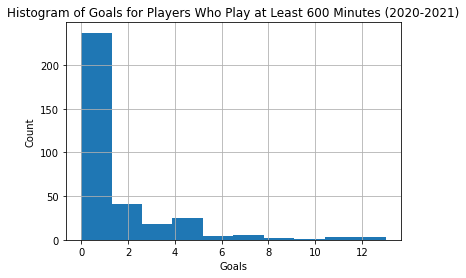

In [50]:
df_key_stats_2021["goals_scored"].hist()
plt.xlabel("Goals")
plt.ylabel("Count")
plt.title("Histogram of Goals for Players Who Play at Least 600 Minutes (2020-2021)")
plt.show()

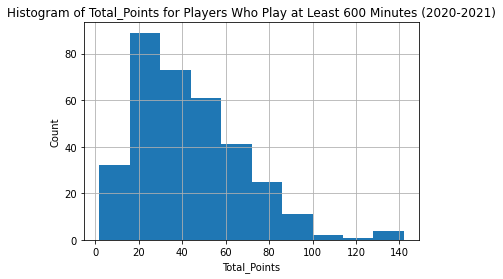

In [51]:
df_key_stats_2021["total_points"].hist()
plt.xlabel("Total_Points")
plt.ylabel("Count")
plt.title("Histogram of Total_Points for Players Who Play at Least 600 Minutes (2020-2021)")
plt.show()

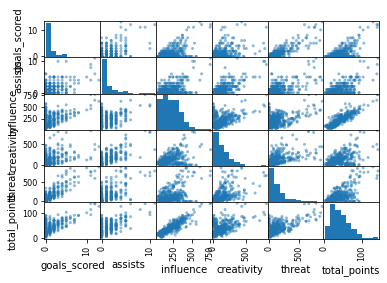

In [52]:
# quick scatter matrix view to see the relationship between variables
scatter_matrix(df_key_stats_2021[["goals_scored","assists","influence","creativity","threat","total_points"]])
plt.xticks(rotation = 90)
plt.show()

In [53]:
array = df_key_stats_2021.values
new_input_X = array[:,3:]
print(new_input_X)
true = array[:,0] # true position of the player
predictions = model.predict(new_input_X)
print(new_input_X)
print(new_input_X, predictions)

[[6.4 '1.7' 19 ... 79.0 69.5 89.0]
 [5.5 '2.0' 26 ... 74.4 58.8 120.0]
 [4.2 '2.2' 11 ... 84.6 121.7 61.0]
 ...
 [5.4 '4.6' 87 ... 378.6 463.2 47.0]
 [5.0 '4.2' 79 ... 384.0 0.0 0.0]
 [5.5 '4.2' 80 ... 474.4 0.0 0.0]]
[[6.4 '1.7' 19 ... 79.0 69.5 89.0]
 [5.5 '2.0' 26 ... 74.4 58.8 120.0]
 [4.2 '2.2' 11 ... 84.6 121.7 61.0]
 ...
 [5.4 '4.6' 87 ... 378.6 463.2 47.0]
 [5.0 '4.2' 79 ... 384.0 0.0 0.0]
 [5.5 '4.2' 80 ... 474.4 0.0 0.0]]
[[6.4 '1.7' 19 ... 79.0 69.5 89.0]
 [5.5 '2.0' 26 ... 74.4 58.8 120.0]
 [4.2 '2.2' 11 ... 84.6 121.7 61.0]
 ...
 [5.4 '4.6' 87 ... 378.6 463.2 47.0]
 [5.0 '4.2' 79 ... 384.0 0.0 0.0]
 [5.5 '4.2' 80 ... 474.4 0.0 0.0]] ['MID' 'FWD' 'MID' 'MID' 'MID' 'MID' 'MID' 'DEF' 'FWD' 'DEF' 'DEF' 'DEF'
 'DEF' 'MID' 'MID' 'MID' 'MID' 'MID' 'DEF' 'MID' 'MID' 'DEF' 'MID' 'MID'
 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'FWD' 'MID' 'MID' 'DEF' 'MID'
 'GKP' 'MID' 'MID' 'DEF' 'MID' 'DEF' 'MID' 'DEF' 'DEF' 'MID' 'DEF' 'MID'
 'MID' 'MID' 'MID' 'DEF' 'DEF' 'MID' 'MID' 'MID' 'MID'

In [54]:
print(accuracy_score(true, predictions))
print(confusion_matrix(true, predictions))
print(classification_report(true, predictions))

0.8200589970501475
[[103   0   1  26]
 [  0  36   0   5]
 [  0   0  21   0]
 [ 22   7   0 118]]
              precision    recall  f1-score   support

         DEF       0.82      0.79      0.81       130
         FWD       0.84      0.88      0.86        41
         GKP       0.95      1.00      0.98        21
         MID       0.79      0.80      0.80       147

    accuracy                           0.82       339
   macro avg       0.85      0.87      0.86       339
weighted avg       0.82      0.82      0.82       339



In [55]:
df_key_stats_2021["predicted"] = predictions
df_key_stats_2021 = df_key_stats_2021[["predicted","position","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_key_stats_2021 = df_key_stats_2021.sort_values('total_points', inplace=False, ascending=False)
df_key_stats_2021.head(50)

,predicted,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,...,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
314,FWD,FWD,Harry,Kane,11.2,7.9,142,12.7,1609,12,...,6,0,0,0,1,0,26,763.4,371.1,790.0
309,MID,MID,Bruno Miguel,Borges Fernandes,11.3,7.4,140,12.4,1565,11,...,6,0,0,1,4,0,22,757.8,822.1,672.0
288,MID,MID,Heung-Min,Son,9.7,7.7,139,14.3,1526,12,...,8,0,0,0,0,0,18,639.2,494.7,598.0
275,MID,MID,Mohamed,Salah,12.5,7.2,129,10.3,1471,13,...,5,0,0,0,0,0,13,616.8,441.0,896.0
277,FWD,FWD,Jamie,Vardy,10.1,6.4,116,11.5,1476,11,...,6,0,0,1,1,0,17,527.8,183.3,762.0
289,MID,MID,Jack,Grealish,7.7,6.2,105,13.6,1527,5,...,9,0,0,0,4,0,11,541.4,779.6,752.0
307,FWD,FWD,Patrick,Bamford,6.7,5.7,103,15.4,1546,10,...,6,0,0,0,1,0,13,433.8,123.6,870.0
256,FWD,FWD,Dominic,Calvert-Lewin,7.6,5.9,95,12.5,1405,11,...,5,0,0,0,3,0,10,457.8,145.7,772.0
257,MID,MID,Kevin,De Bruyne,11.9,5.6,95,8.0,1405,3,...,9,0,0,1,1,0,12,514.6,796.8,663.0
305,MID,MID,Marcus,Rashford,9.6,4.9,93,9.7,1537,7,...,6,0,0,0,3,0,4,446.4,318.5,635.0
